# Deep learning sentence classification

## SpoilerBlockerAI Subproject

In [1]:
# Imports

from keras import layers
from keras.models import Sequential
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D, LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
# Loading data
df = pd.read_csv("csvCut/goodreads_reviews_spoiler_part_1.csv", nrows=50000)

df.head()

,index,has_spoiler,sentence
0,0,0,This is a special book.
1,1,0,"It started slow for about the first third, the..."
2,2,0,This is what I love about good science fiction...
3,3,0,"It is a 2015 Hugo winner, and translated from ..."
4,4,0,For instance the intermixing of Chinese revolu...


In [3]:
df.isnull().values.any()

False

In [4]:
# Data definition

sentences = list(df['sentence'].apply(lambda s: s.lower()))
spoilers = np.array(df["has_spoiler"])

print(len(sentences))
print(f"\n{sentences[5]}")

50000

it is a book about science, and aliens.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(sentences, spoilers, test_size=0.30, random_state=42)

In [6]:
# Data preparation

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('embeddings/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


## Simple neural network

In [7]:
# Model preparation

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          2417100   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 2,427,101
Trainable params: 10,001
Non-trainable params: 2,417,100
_________________________________________________________________


In [9]:
# Training the model

history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
219/219 [==============================] - 4s 14ms/step - loss: 0.5432 - acc: 0.7595 - val_loss: 0.4897 - val_acc: 0.7816
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4862 - acc: 0.7786 - val_loss: 0.4857 - val_acc: 0.7817
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4649 - acc: 0.7897 - val_loss: 0.4836 - val_acc: 0.7816
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4591 - acc: 0.7918 - val_loss: 0.4833 - val_acc: 0.7800
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4498 - acc: 0.7956 - val_loss: 0.4893 - val_acc: 0.7829
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4421 - acc: 0.8017 - val_loss: 0.4843 - val_acc: 0.7819
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4435 - acc: 0.7969 - val_loss: 0.4908 - val_acc: 0.7746
Epoch 8/10
219/219 [==============================] - 1s 5ms/step - loss: 0

In [10]:
# Predicting spoilers

score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

469/469 [==============================] - 1s 1ms/step - loss: 0.4952 - acc: 0.7725
Test Score: 0.4951774775981903
Test Accuracy: 0.7725333571434021


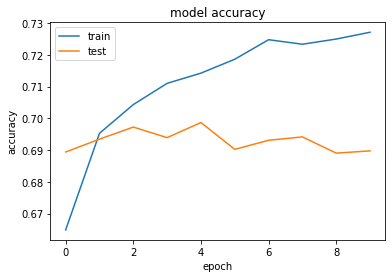

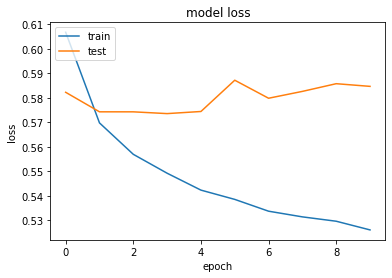

In [43]:
# Plotting model's loss and accuracy on train and test data for each epoch

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Convolutional neural network

In [11]:
# Convolutial neural network model preparation

model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2417100   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,481,357
Trainable params: 64,257
Non-trainable params: 2,417,100
_________________________________________________________________


In [12]:
# Fit and predict

history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/6
219/219 [==============================] - 10s 44ms/step - loss: 0.5383 - acc: 0.7511 - val_loss: 0.4617 - val_acc: 0.7886
Epoch 2/6
219/219 [==============================] - 9s 43ms/step - loss: 0.4445 - acc: 0.7929 - val_loss: 0.4611 - val_acc: 0.7897
Epoch 3/6
219/219 [==============================] - 10s 46ms/step - loss: 0.4112 - acc: 0.8131 - val_loss: 0.4630 - val_acc: 0.7859
Epoch 4/6
219/219 [==============================] - 11s 52ms/step - loss: 0.3792 - acc: 0.8292 - val_loss: 0.4448 - val_acc: 0.7914
Epoch 5/6
219/219 [==============================] - 12s 54ms/step - loss: 0.3448 - acc: 0.8498 - val_loss: 0.4455 - val_acc: 0.8004
Epoch 6/6
469/469 [==============================] - 2s 4ms/step - loss: 0.4547 - acc: 0.7877
Test Score: 0.45472079515457153
Test Accuracy: 0.7877333164215088


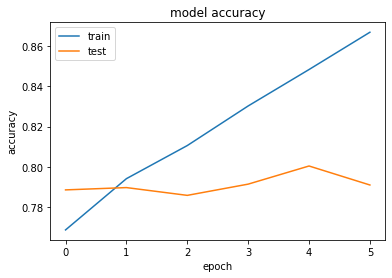

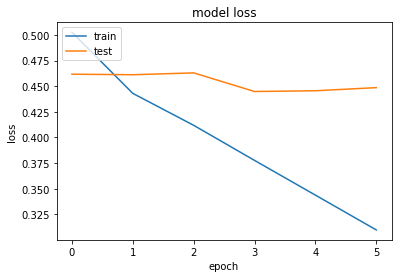

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## Recurrent neural network (LSTM)

In [14]:
# Recurrent neural network model preparation

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2417100   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,534,477
Trainable params: 117,377
Non-trainable params: 2,417,100
_________________________________________________________________
Epoch 1/6
219/219 [==============================] - 43s 180ms/step - loss: 0.5696 - acc: 0.7641 - val_loss: 0.5341 - val_acc: 0.7764
Epoch 2/6
219/219 [==============================] - 36s 166ms/step - loss: 0.5462 - acc: 0.7652 - val_loss: 0.5309 - val_acc: 0.7766
Epoch 3/6
219/219 [==============================] - 37s 167ms/step - loss: 0.5320 - acc: 0.7746 - v

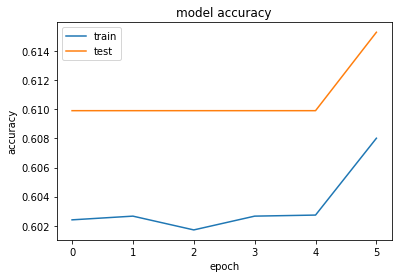

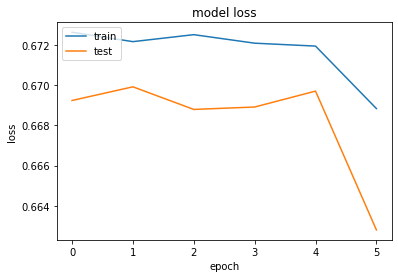

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()